<문제 : https://programmers.co.kr/learn/courses/30/lessons/64061>

## 크레인 인형뽑기 게임  
  
    
    
- 문제 설명
  - 게임개발자인 "죠르디"는 크레인 인형뽑기 기계를 모바일 게임으로 만들려고 합니다.
  - "죠르디"는 게임의 재미를 높이기 위해 화면 구성과 규칙을 다음과 같이 게임 로직에 반영하려고 합니다.

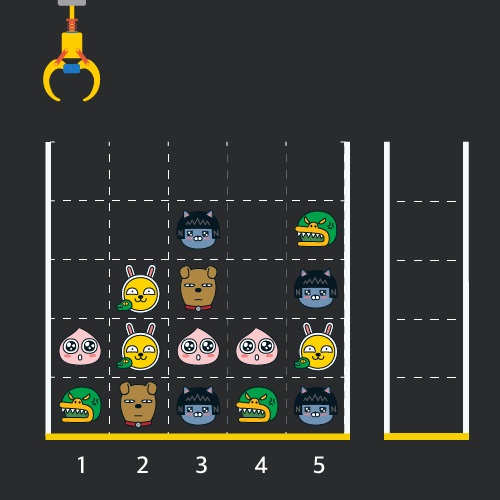

> 게임 화면은 "1 x 1" 크기의 칸들로 이루어진 "N x N" 크기의 정사각 격자이며 위쪽에는 크레인이 있고 오른쪽에는 바구니가 있습니다. (위 그림은 "5 x 5" 크기의 예시입니다). 각 격자 칸에는 다양한 인형이 들어 있으며 인형이 없는 칸은 빈칸입니다. 모든 인형은 "1 x 1" 크기의 격자 한 칸을 차지하며 격자의 가장 아래 칸부터 차곡차곡 쌓여 있습니다. 게임 사용자는 크레인을 좌우로 움직여서 멈춘 위치에서 가장 위에 있는 인형을 집어 올릴 수 있습니다. 집어 올린 인형은 바구니에 쌓이게 되는 데, 이때 바구니의 가장 아래 칸부터 인형이 순서대로 쌓이게 됩니다. 다음 그림은 [1번, 5번, 3번] 위치에서 순서대로 인형을 집어 올려 바구니에 담은 모습입니다.

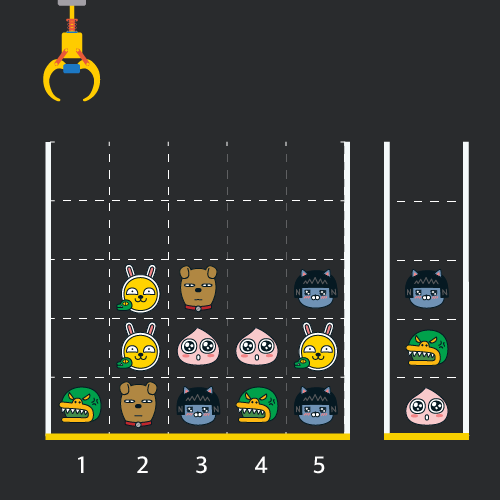

> 만약 같은 모양의 인형 두 개가 바구니에 연속해서 쌓이게 되면 두 인형은 터뜨려지면서 바구니에서 사라지게 됩니다. 위 상태에서 이어서 [5번] 위치에서 인형을 집어 바구니에 쌓으면 같은 모양 인형 두 개가 없어집니다.

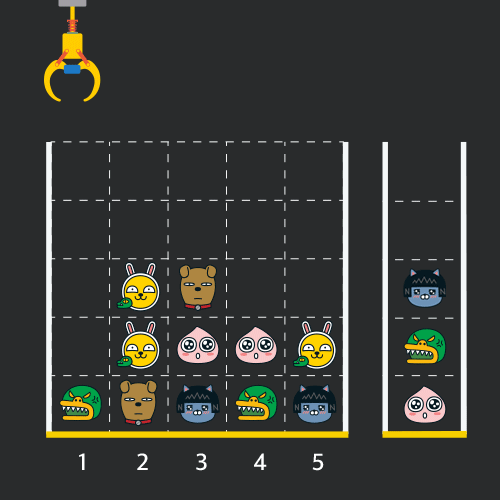

> 크레인 작동 시 인형이 집어지지 않는 경우는 없으나 만약 인형이 없는 곳에서 크레인을 작동시키는 경우에는 아무런 일도 일어나지 않습니다. 또한 바구니는 모든 인형이 들어갈 수 있을 만큼 충분히 크다고 가정합니다. (그림에서는 화면표시 제약으로 5칸만으로 표현하였음)

> 게임 화면의 격자의 상태가 담긴 2차원 배열 board와 인형을 집기 위해 크레인을 작동시킨 위치가 담긴 배열 moves가 매개변수로 주어질 때, 크레인을 모두 작동시킨 후 터트려져 사라진 인형의 개수를 return 하도록 solution 함수를 완성해주세요.  
  
  
- [제한사항]
  - board 배열은 2차원 배열로 크기는 "5 x 5" 이상 "30 x 30" 이하입니다.
  - board의 각 칸에는 0 이상 100 이하인 정수가 담겨있습니다.
  - 0은 빈 칸을 나타냅니다.
  - 1 ~ 100의 각 숫자는 각기 다른 인형의 모양을 의미하며 같은 숫자는 같은 모양의 인형을 나타냅니다.
  - moves 배열의 크기는 1 이상 1,000 이하입니다.
  - moves 배열 각 원소들의 값은 1 이상이며 board 배열의 가로 크기 이하인 자연수입니다.  
    
    
- 입출력 예 

board|moves|result 
--|--|-- 
[[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]|[1,5,3,5,1,2,1,4]|4  
  
  
- 입출력 예에 대한 설명
  - 입출력 예 #1

> 인형의 처음 상태는 문제에 주어진 예시와 같습니다. 크레인이 [1, 5, 3, 5, 1, 2, 1, 4] 번 위치에서 차례대로 인형을 집어서 바구니에 옮겨 담은 후, 상태는 아래 그림과 같으며 바구니에 담는 과정에서 터트려져 사라진 인형은 4개 입니다.

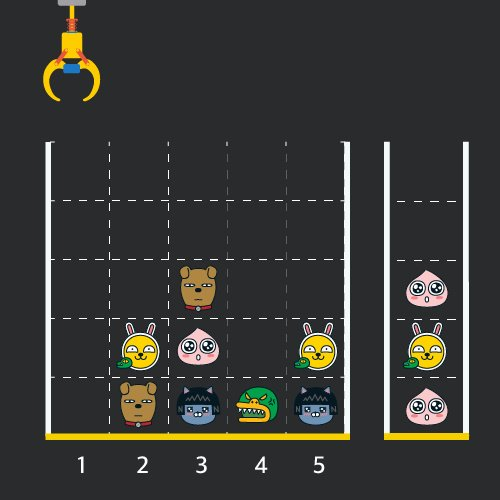

### 알고리즘  

- 전달되는 배열 파악
  - board
    - board의 첫 번째 배열 [0, 0, 0, 0, 0]은 제일 위의 가로 행을 의미
    - board의 마지막 배열 [3, 5, 1, 3, 1]은 제일 아랫줄의 가로 행을 나타냄  
  - moves
    - 각 성분(값)은 세로 열을 의미
    - 값이 0부터가 아니므로 배열의 인덱스보다 1이 큰 수임을 생각해야 합니다
    - moves[1] = 5 : 5번째 열의 가장 위의 값을 가져온다는 의미
  - c
    - 오른쪽 인형이 쌓이는 배열입니다  
      
      
- moves = [1, 5, 3]
  - moves[0] = 1
    - board의 첫 번째 열에서 위에서 0이 아닌 최초 값을 가져옵니다 : board[0][j]
    - board[0][j] = 0 : 인형을 가져갔으므로 0으로 값을 바꿉니다
    - 배열 c에 추가합니다
  - moves[1] = 5
    - board의 다섯 번째 열에서 위에서 0이 아닌 최초 값을 가져옵니다 : board[4][j]
    - board[4][j] = 0 : 인형을 가져갔으므로 0으로 값을 바꿉니다
    - 배열 c의 마지막 값과 집어올린 board의 인형이 같은 값인지 확인하고 같으면 인형 두 개를 지워야 합니다
    - 같은 값이 나오면 count에 1을 더합니다
  - moves[2] = 3 : 같은 방법으로 시행합니다  
    
      
- 최종 count * 2만큼 인형이 지워집니다. 이 값을 반환합니다.
    

- 중간에 프린트 문을 넣은 것은 오류를 잡기 위한 방법입니다 : 디버깅

In [1]:
import numpy as np

a = [[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]

# for i in range(len(a)):
#     print(a[i])
    
b = [1,5,3,5,1,2,1,4]
c = []
count = 0

for i in b:
    for k in range(len(a)):
        print(a[k])
    print()

    for j in range(len(a)):
#         print(i-1, j)
        if a[j][i-1] != 0:
#             print(c)
            if len(c) > 0 and c[-1] == a[j][i-1]:
#                 print("01")
                count += 1
                c.pop()
                a[j][i-1] = 0
                break
            c.append(a[j][i-1])
            a[j][i-1] = 0
            break
    
c, count

[0, 0, 0, 0, 0]
[0, 0, 1, 0, 3]
[0, 2, 5, 0, 1]
[4, 2, 4, 4, 2]
[3, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 1, 0, 3]
[0, 2, 5, 0, 1]
[0, 2, 4, 4, 2]
[3, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 2, 5, 0, 1]
[0, 2, 4, 4, 2]
[3, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 2, 5, 0, 1]
[0, 2, 4, 4, 2]
[3, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 2, 5, 0, 0]
[0, 2, 4, 4, 2]
[3, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 2, 5, 0, 0]
[0, 2, 4, 4, 2]
[0, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 5, 0, 0]
[0, 2, 4, 4, 2]
[0, 5, 1, 3, 1]

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 5, 0, 0]
[0, 2, 4, 4, 2]
[0, 5, 1, 3, 1]



([4, 2, 4], 2)

In [2]:
def solution(board, moves):
    answer = 0
    c = []

    for i in moves:
        for j in range(len(board)):
            if board[j][i-1] != 0:
                if len(c) > 0 and c[-1] == board[j][i-1]:
                    answer += 1
                    c.pop()
                    board[j][i-1] = 0
                    break
                c.append(board[j][i-1])
                board[j][i-1] = 0
                break
                
    return answer * 2